In [1]:
from aux_train import *
from aux_plot import *
import API_Numpy

float_pres = 'float64' # Definindo a precisão padrão para as análises

In [7]:
Δx=2/128
CFL=0.5
Δt=0.4/100
n=100

fronteira=FronteiraPeriodica

import time as t

initial_time=t.time()
count=0
total=3*11*8*5*7
for equation in [diff_equation,transp_equation,burgers_equation]:
        for poly_grade in range(11):
                for seno_ampli in range(8):
                        for gauss_var in range(5):
                                for seizures in range(7):
                                        if poly_grade+seno_ampli+gauss_var>1:
                                                seed=np.random.seed()
                                                np.random.seed(seed=seed)
                                                y,dy,y_t=create_dataset(
                                                        n=n,
                                                        poly_grade=poly_grade,
                                                        seno_ampli=seno_ampli,
                                                        gauss_var=gauss_var,
                                                        Δx=Δx,
                                                        Δt=Δt,
                                                        Total_time=100,
                                                        granul_ref=8,
                                                        seizures=0,
                                                        fronteira=fronteira,
                                                        equation=equation)

                                                save_dataset(f'datasets/polys grau={poly_grade} seno_ampli={seno_ampli} gauss_var={gauss_var} seizure={seizures}',y_t,dy,y,Δx,Δt,CFL,fronteira,equation,seed)

                                                count+=1
                                                spent_time=t.time()-initial_time
                                                p_finished=count/total

                                                prev_time=spent_time/p_finished

                                                show_hour=int(prev_time//3600)
                                                prev_time=prev_time%3600

                                                show_min=int(prev_time//60)
                                                prev_time=round(prev_time%60)

                                                print(f'{str(np.round(p_finished*100,2)).zfill(5)}% - ETA:{show_hour}:{str(show_min).zfill(2)}:{str(prev_time).zfill(2)}               ',end='\r')

[   1  320  640  960 1279]


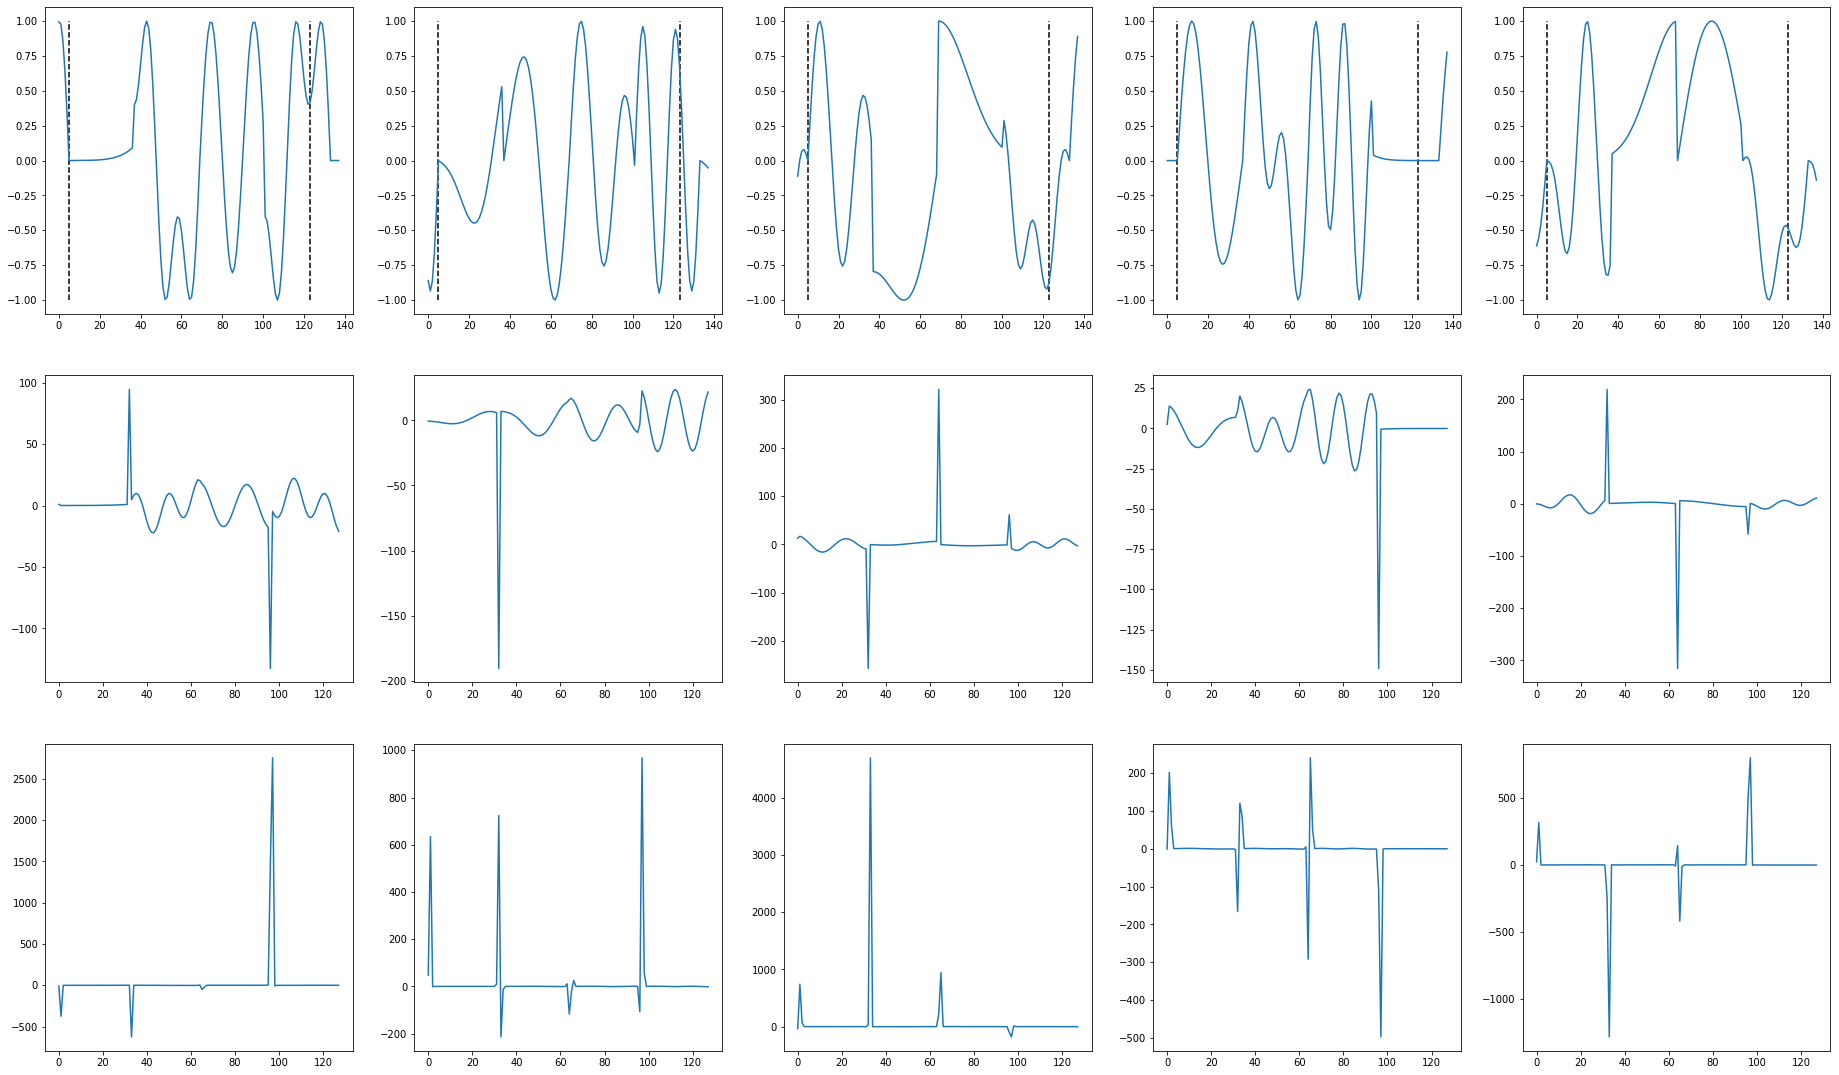

In [6]:
seed=np.random.seed()
np.random.seed(seed=seed)
n=50


poly_grade=False
seno_ampli=10
gauss_var=10
seizures=0

fronteira=FronteiraPeriodica
equation=diff_equation

y,dy,y_t=create_dataset(
        n=50,
        poly_grade=poly_grade,
        seno_ampli=seno_ampli,
        gauss_var=gauss_var,
        Δx=Δx,
        Δt=Δt,
        Total_time=10,
        granul_ref=10,
        seizures=4,
        fronteira=fronteira,
        equation=equation)

index=np.floor(np.random.uniform(size=[5],low=0,high=n)).astype('int32')

k=5

plt.figure(figsize=(6.4*5,6.4*3))
for i,j in zip(range(5),index):
    plt.subplot(3, 5, i+1)
    plt.plot(fronteira(y[j],API_Numpy,k))
    plt.vlines(
                x          = k,
                color      = 'black',
                ymax=1,
                ymin=-1,
                linestyles = '--'
            )
    plt.vlines(
                x          = y.shape[-1]-k,
                ymax=1,
                ymin=-1,
                color      = 'black',
                linestyles = '--'
            )
    plt.subplot(3, 5, i+6)
    plt.plot(dy[j])
    plt.subplot(3, 5, i+11)
    plt.plot(y_t[j,-1])

save_dataset(f'datasets/polys grau={poly_grade} seizure={seizures}',y_t,dy,y,Δx,Δt,CFL,fronteira,equation,seed)

In [5]:
y.shape

(50, 129)